Exercise 1 In Section 10.4 I describe convolution as the sum of shifted, scaled copies of a signal.
But in Section 10.3, when we multiply the DFT of the signal by the transfer function, that operation corresponds to circular convolution, which assumes that the signal is periodic. As a result, you might notice that the output contains an extra note at the beginning, which wraps around from the end.
Fortunately, there is a standard solution to this problem. If you add enough zeros to the end of the signal before computing the DFT, you can avoid the wrap-around effect.
Modify the example in chap10.ipynb and confirm that zero-padding eliminates the extra note at the beginning of the output.

In [28]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

PI2 = 2 * np.pi

np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

No handles with labels found to put in legend.


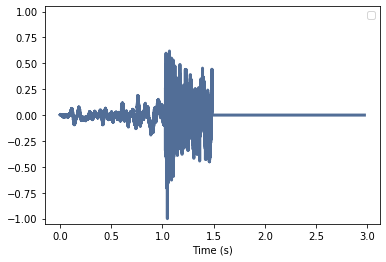

In [29]:
response = thinkdsp.read_wave('417345__inspectorj__gunshot-distant-a.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

No handles with labels found to put in legend.


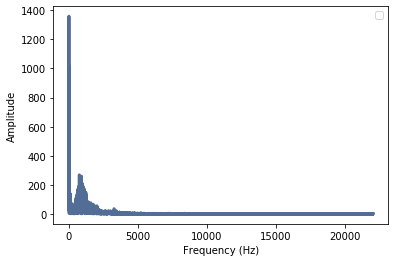

In [30]:
transfer = response.make_spectrum()
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

No handles with labels found to put in legend.


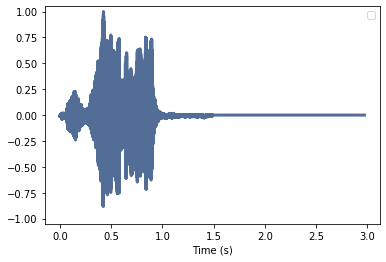

In [34]:
violin = thinkdsp.read_wave('411728__inspectorj__violin-glissando-ascending-a-h1.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [35]:
spectrum = violin.make_spectrum()

In [36]:
output = (spectrum * transfer).make_wave()
output.normalize()

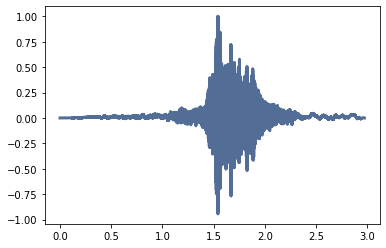

In [37]:
output.plot()

In [38]:
output.make_audio()

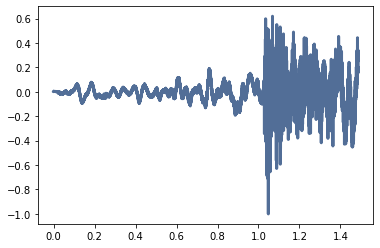

In [39]:
response.truncate(2**16)
response.plot()

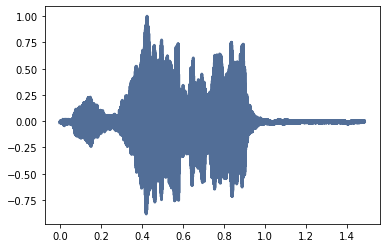

In [40]:
violin.truncate(2**16)
violin.plot()

In [41]:
output2 = violin.convolve(response)

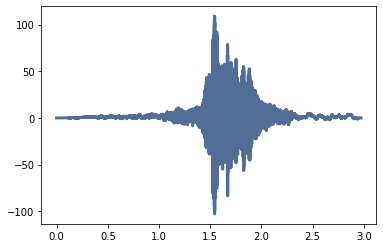

In [42]:
output2.plot()

In [43]:
output2.make_audio()

In [44]:
len(output), len(output2)

(131072, 131071)

使用了FFT，因此速度更快

In [45]:
import scipy.signal
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = thinkdsp.Wave(ys, framerate=violin.framerate)

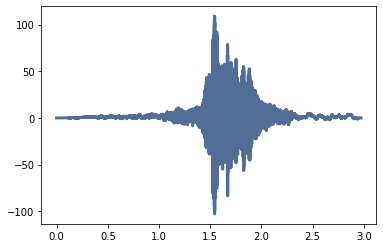

In [46]:
output3.plot()

In [47]:
output3.make_audio()

In [48]:
output2.max_diff(output3)

7.105427357601002e-14

Exercise 2 The Open AIR library provides a “centralized… on-line resource for anyone interested in auralization and acoustical impulse response data” (http://www.openairlib.net). Browse their collection of impulse response data and download one that sounds interesting. Find a short recording that has the same sample rate as the impulse response you downloaded.
Simulate the sound of your recording in the space where the impulse response was measured, computed two ways: by convolving the recording with the impulse response and by computing the filter that corresponds to the impulse response and multiplying by the DFT of the recording.

No handles with labels found to put in legend.
C:\Users\Tweety\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Tweety\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


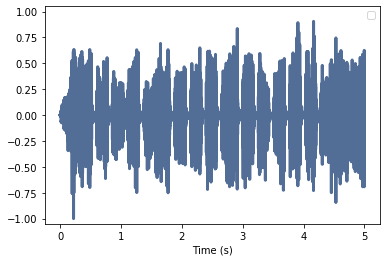

In [49]:
response = thinkdsp.read_wave('155399__izaiah__175mid-line-a-mono.wav')

start = 0
duration = 5
response = response.segment(duration=duration)
response.shift(-start)

response.normalize()
response.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [50]:
response.make_audio()

No handles with labels found to put in legend.


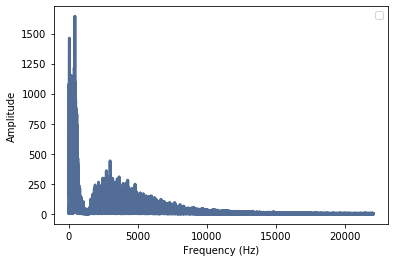

In [51]:
transfer = response.make_spectrum()
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

No handles with labels found to put in legend.


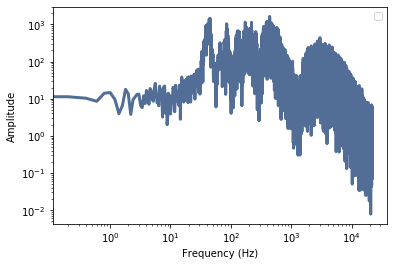

In [52]:
transfer.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude',
                 xscale='log', yscale='log')

No handles with labels found to put in legend.
C:\Users\Tweety\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Tweety\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


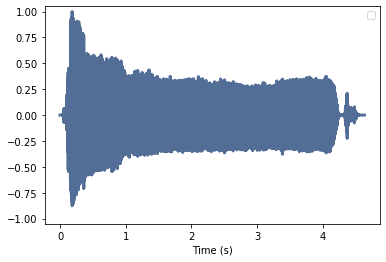

In [64]:
wave = thinkdsp.read_wave('484267__inspectorj__party-pack-horn-coil-01-long-01.wav')

start = 0.0
wave = wave.segment(start=start)
wave.shift(-start)

wave.truncate(len(response))
wave.normalize()
wave.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

In [65]:
wave.make_audio()

In [66]:
spectrum = wave.make_spectrum()

In [67]:
len(spectrum.hs), len(transfer.hs)

(102239, 110251)

In [68]:
spectrum.fs

array([    0.   ,     0.216,     0.431, ..., 22049.461, 22049.676,
       22049.892])

In [76]:
transfer.fs

array([    0. ,     0.2,     0.4, ..., 22049.6, 22049.8, 22050. ])

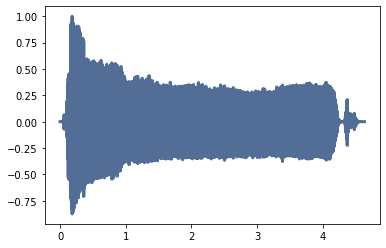

In [71]:
wave.plot()

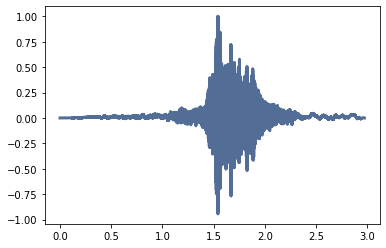

In [72]:
output.plot()

In [73]:
output.make_audio()

用convolve方法對進行計算：

In [75]:
convolved2 = wave.convolve(response)
convolved2.normalize()
convolved2.make_audio()